In [1]:
%load_ext autoreload
%autoreload 2

from imports import *
from models import *
from utils import *
from data import *
from configs import CONFIGS, EXP_CODES

In [2]:
'''
load dataset
'''


config_name = 'bird3d'
config = deepcopy(CONFIGS[config_name])

train_dataset, test_dataset, train_loader, test_loader = get_dataset_dataloader(config)

100%|██████████| 5000/5000 [00:01<00:00, 4685.24it/s]


### True space

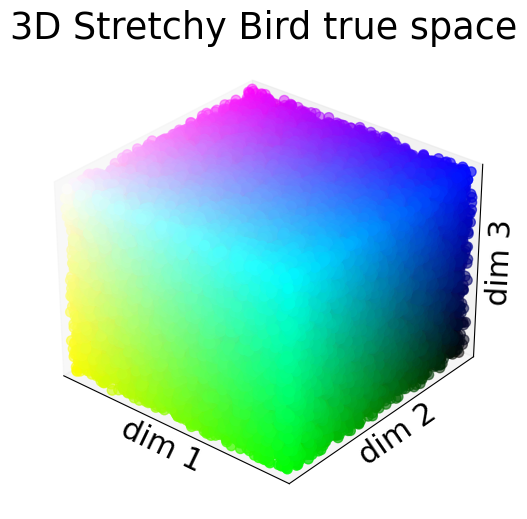

In [17]:
config_name = 'bird3d'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=100000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


plt.rcParams.update({'font.size': 22})#, 'font.sans-serif' : 'Helvetica'})

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*gt_vs.T, c=colors, s=50)

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('3D Stretchy Bird true space')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(azim=130.0)

plt.savefig('./figures/bird3d_true_space.png')

### Our results

In [19]:
config_name = 'bird3d'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_ours, transformed_pred_velocities_ours, fit_errors_ours = [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = our_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    pred_velocities_ours.append(pred_velocities)
    transformed_pred_velocities_ours.append(transformed_pred_velocities)
    fit_errors_ours.append(error)


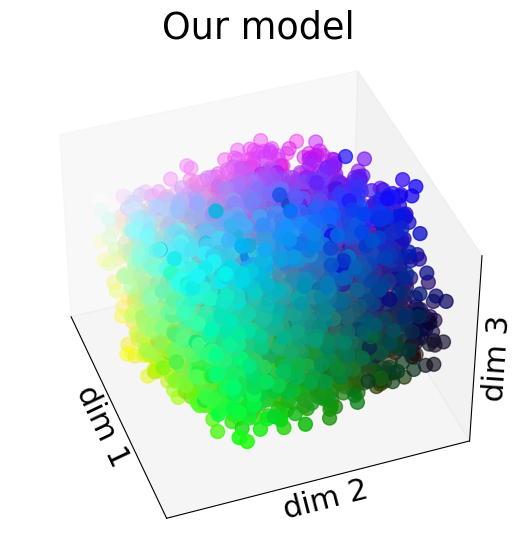

In [24]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*pred_velocities_ours[0].T, c=colors, s=100)

ax.set_xlim([-0.05, 0.05])
ax.set_ylim([-0.05, 0.05])
ax.set_zlim([-0.05, 0.05])
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('Our model')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=40, azim=160.0)

plt.tight_layout()

plt.savefig('./figures/bird3d_ours.png')

### PCA results

In [21]:
config_name = 'bird3d'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



pca_pred_velocities = pca_reduction(
    trajectory,
    config,
    3,
)

fit_error_pca, pca_transformed_pred_velocities = compute_error_metric(
    gt_velocities,
    pca_pred_velocities,
)

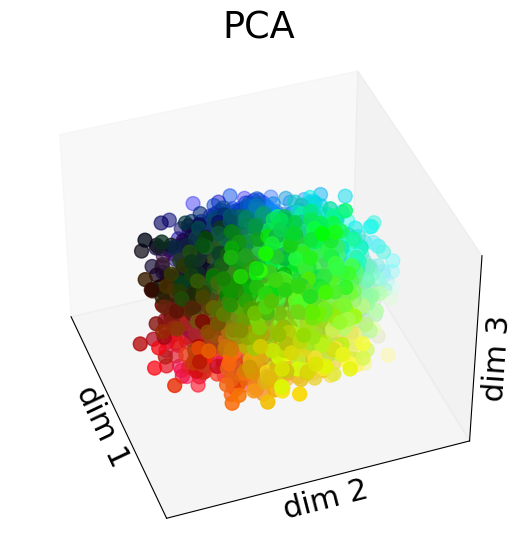

In [25]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*pca_pred_velocities.T, c=colors, s=100)

# ax.set_xlim([-1.0, 1.0])
# ax.set_ylim([-1.0, 1.0])
# ax.set_zlim([-1.0, 1.0])
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('PCA')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=40, azim=160.0)

plt.tight_layout()

plt.savefig('./figures/bird3d_pca.png')

### Isomap results

In [26]:
config_name = 'bird3d'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



isomap_pred_velocities = isomap_reduction(
    trajectory,
    config,
    3,
)

fit_error_isomap, isomap_transformed_pred_velocities = compute_error_metric(
    gt_velocities,
    isomap_pred_velocities,
)

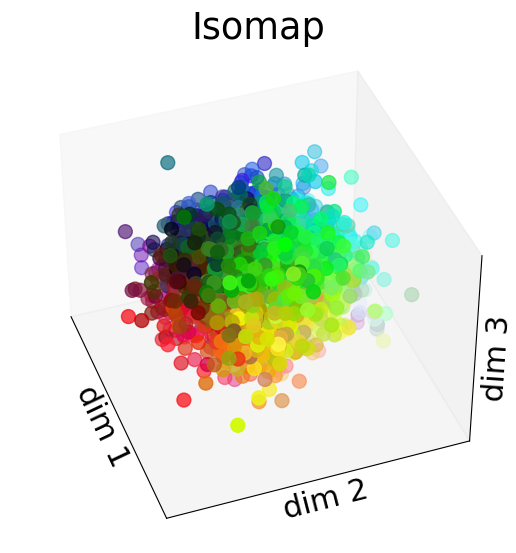

In [27]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*isomap_pred_velocities.T, c=colors, s=100)

# ax.set_xlim([-2.0, 2.0])
# ax.set_ylim([-2.0, 2.0])
# ax.set_zlim([-2.0, 2.0])
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('Isomap')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=40, azim=160.0)

plt.tight_layout()
plt.savefig('./figures/bird3d_isomap.png')

### UMAP results

In [28]:
config_name = 'bird3d'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))



umap_pred_velocities = umap_reduction(
    trajectory,
    config,
    3,
)

fit_error_umap, umap_transformed_pred_velocities = compute_error_metric(
    gt_velocities,
    umap_pred_velocities,
)

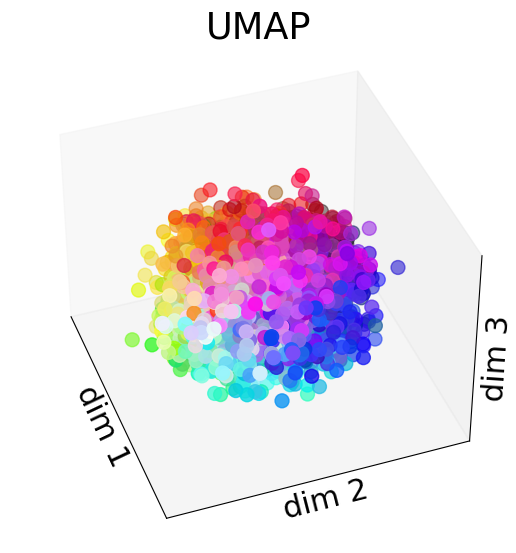

In [29]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*umap_pred_velocities.T, c=colors, s=100)

# ax.set_xlim([-3.5, 3.5])
# ax.set_ylim([-3.5, 3.5])
# ax.set_zlim([-3.5, 3.5])
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('UMAP')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=40, azim=160.0)

plt.tight_layout()
plt.savefig('./figures/bird3d_umap.png')

### Autoencoder results

In [30]:
config_name = 'bird3d_ae'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_ae, transformed_pred_velocities_ae, fit_errors_ae = [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = ae_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    pred_velocities_ae.append(pred_velocities)
    transformed_pred_velocities_ae.append(transformed_pred_velocities)
    fit_errors_ae.append(error)

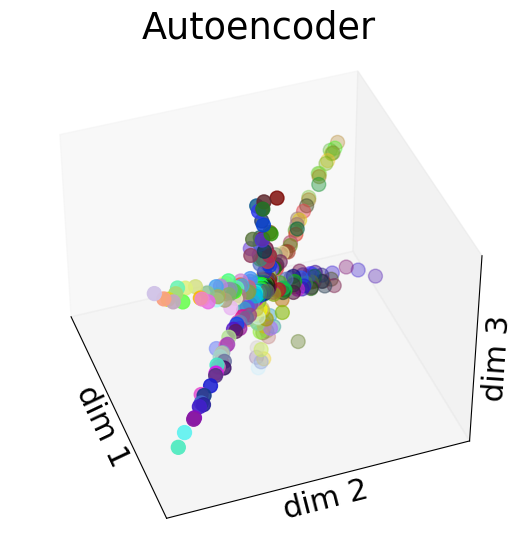

In [31]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*pred_velocities_ae[5].T, c=colors, s=100)

# ax.set_xlim([-40, 40])
# ax.set_ylim([-40, 40])
# ax.set_zlim([-40, 40])
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('Autoencoder')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=40, azim=160.0)

plt.tight_layout()
plt.savefig('./figures/bird3d_ae.png')

### MCNet results

In [32]:
config_name = 'bird3d_mcnet'
config = deepcopy(CONFIGS[config_name])


'''
generate trajectory
'''
trajectory, gt_vs = test_dataset.generate_sample_trajectory(length=5000)

trajectory = trajectory.squeeze(dim=1)
gt_velocities = np.array(gt_vs)
colors = np.array(test_dataset.cmap(gt_vs))

assert gt_velocities.ndim == 2

# pad gt_velocities with necessary zeros
pad = np.zeros((gt_velocities.shape[0], config['model_args']['v_dim'] - gt_velocities.shape[1]))
gt_velocities = np.hstack((gt_velocities, pad))

if np.prod(pad.shape) == 0 and config['task_dim'] == 1:
    gt_velocities = np.hstack((gt_velocities, np.zeros((gt_velocities.shape[0], 1))))


'''
evaluate method
'''
pred_velocities_mcnet, transformed_pred_velocities_mcnet, fit_errors_mcnet = [], [], []

for model_code in EXP_CODES[config_name]:
    pred_velocities = mcnet_reduction(
        trajectory,
        config,
        model_code,
    )

    error, transformed_pred_velocities = compute_error_metric(
        gt_velocities,
        pred_velocities,
    )

    pred_velocities_mcnet.append(pred_velocities)
    transformed_pred_velocities_mcnet.append(transformed_pred_velocities)
    fit_errors_mcnet.append(error)

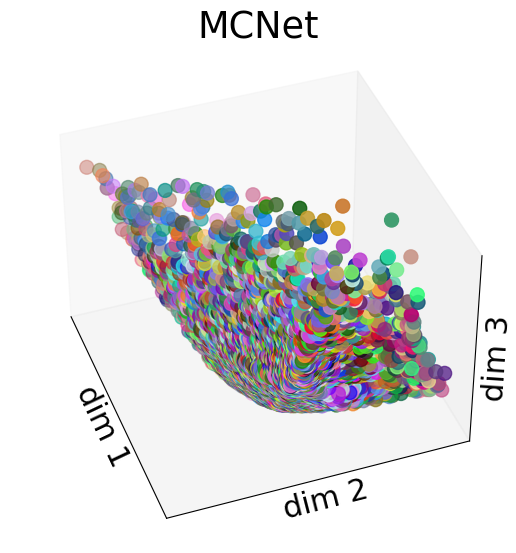

In [33]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(projection='3d')

ax.scatter3D(*pred_velocities_mcnet[2].T, c=colors, s=100)

ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')
ax.set_title('MCNet')

ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.labelpad=-11.5
ax.yaxis.labelpad=-11.5
ax.zaxis.labelpad=-11.5

ax.view_init(elev=40, azim=160.0)

plt.tight_layout()
plt.savefig('./figures/bird3d_mcnet.png')

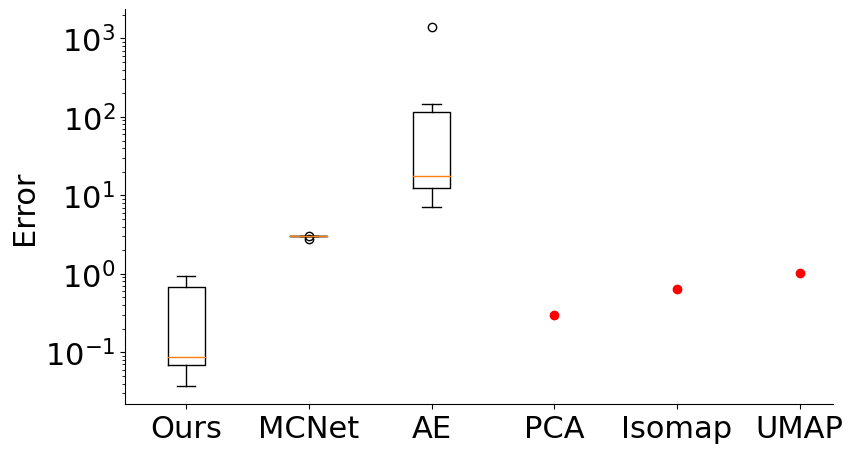

In [34]:
errors = [fit_errors_ours, fit_errors_mcnet, fit_errors_ae, [fit_error_pca], [fit_error_isomap], [fit_error_umap]]

# Create a box plot
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the box plot for experiments with multiple trials
boxplot_data = [e for e in errors if len(e) > 1]
ax.boxplot(boxplot_data, positions=[0, 1, 2])

# Plot the single trial errors as points
single_trial_positions = [3, 4, 5]
single_trial_errors = [e[0] for e in errors if len(e) == 1]
ax.plot(single_trial_positions, single_trial_errors, 'ro')  # 'ro' is for red dots

# Adjust x-axis labels to match the experiments
ax.set_xticks(range(len(errors)))
ax.set_xticklabels(['Ours', 'MCNet', 'AE', 'PCA', 'Isomap', 'UMAP'])

# Set labels and title
ax.set_ylabel('Error')
ax.set_yscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('./figures/bird3d_results.pdf')